In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [193]:
df_bus=pd.read_csv("df_clean_bus.csv")
df_eco=pd.read_csv("df_clean_eco.csv")

In [194]:
df_eco.drop("date",axis=1,inplace=True)

In [195]:
df_bus.head()

,num_code,price,dep_hour,dep_min,arr_hour,arr_min,hour_travel,minute_travel,time_date,month,...,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai
0,868,25612,18,0,20,0,2,0,11,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,624,25612,19,0,21,15,2,15,11,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,531,42220,20,0,20,45,24,45,11,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,839,44450,21,25,23,55,26,30,11,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,544,46690,17,15,23,55,6,40,11,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


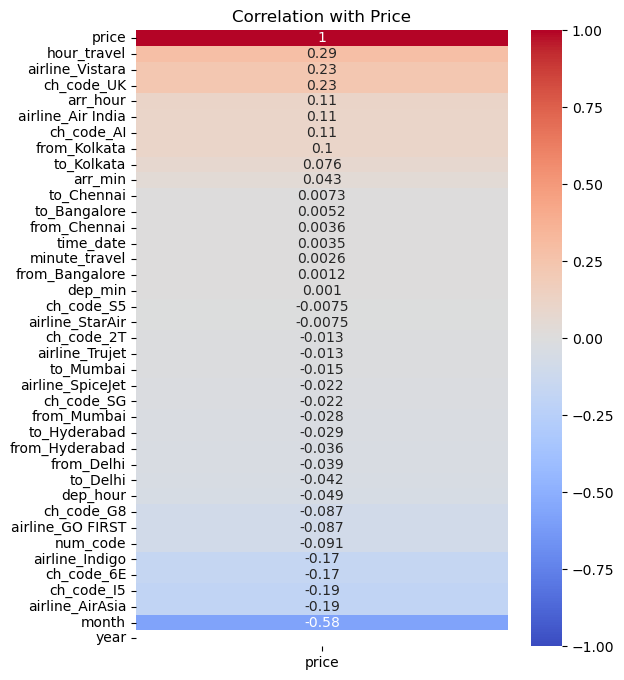

In [196]:
corr_matrix = df_eco.corr()
price_corr = corr_matrix[['price']].sort_values(by='price', ascending=False)
plt.figure(figsize=(6,8)) 
sns.heatmap(price_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with Price')
plt.show()

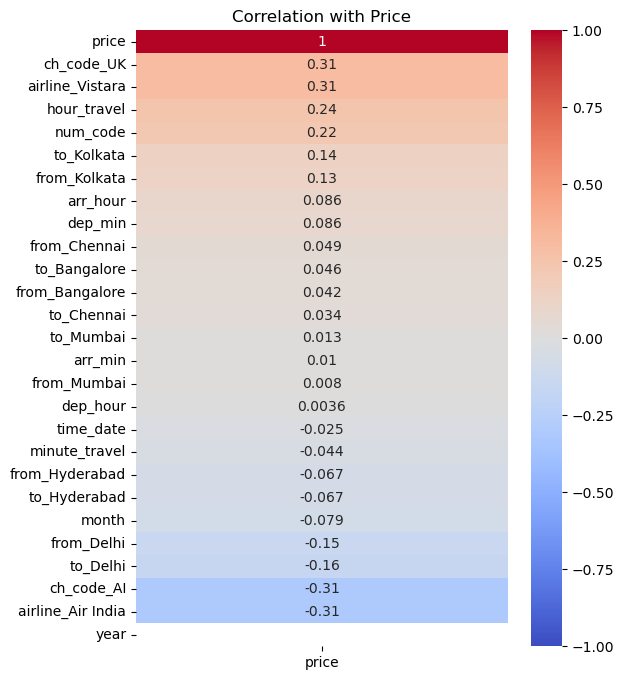

In [197]:
corr_matrix = df_bus.corr()
price_corr = corr_matrix[['price']].sort_values(by='price', ascending=False)
plt.figure(figsize=(6,8)) 
sns.heatmap(price_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with Price')
plt.show()

In [198]:

def filter_good_correlation(df, target_column, threshold=0.3):
    """
    Filters the features in a DataFrame that have a strong positive or negative 
    correlation with the target variable.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the features and target variable.
    target_column (str): The name of the target column to calculate correlation with.
    threshold (float): The correlation threshold to consider a feature as good.

    Returns:
    pd.DataFrame: A DataFrame containing only the features with correlation above the threshold.
    """
    # Calculate correlation matrix
    corr_matrix = df.corr()

    # Get correlations with the target column (including positive and negative)
    target_corr = corr_matrix[target_column]

    # Filter features with absolute correlation above the threshold (both positive and negative)
    good_corr_features = target_corr[(target_corr >= threshold) | (target_corr <= -threshold)]

    # Return the DataFrame with only the filtered features (including the target column)
    return df[good_corr_features.index]

# Example usage:
# df_filtered = filter_good_correlation(df_eco, 'price', threshold=0.3)


In [199]:
df_feature_eco=filter_good_correlation(df_eco,"price",threshold=0.1)

In [200]:
df_feature_eco

,price,arr_hour,hour_travel,month,airline_Air India,airline_AirAsia,airline_Indigo,airline_Vistara,ch_code_6E,ch_code_AI,ch_code_I5,ch_code_UK,from_Kolkata
0,5953,21,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5953,8,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5956,6,2,2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,5955,12,2,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,5955,11,2,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206769,7697,20,13,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
206770,7709,20,13,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
206771,8640,9,20,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
206772,8640,9,23,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [201]:
df_feature_bus=filter_good_correlation(df_bus,"price",threshold=0.1)

In [202]:
df_feature_bus.head()

,num_code,price,hour_travel,airline_Air India,airline_Vistara,ch_code_AI,ch_code_UK,from_Delhi,from_Kolkata,to_Delhi,to_Kolkata
0,868,25612,2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,624,25612,2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,531,42220,24,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,839,44450,26,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,544,46690,6,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


## Data Prep For Training

In [203]:
df_feature_eco

,price,arr_hour,hour_travel,month,airline_Air India,airline_AirAsia,airline_Indigo,airline_Vistara,ch_code_6E,ch_code_AI,ch_code_I5,ch_code_UK,from_Kolkata
0,5953,21,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5953,8,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5956,6,2,2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,5955,12,2,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,5955,11,2,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206769,7697,20,13,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
206770,7709,20,13,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
206771,8640,9,20,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
206772,8640,9,23,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [206]:
Q1 = df_feature_eco['price'].quantile(0.25)
Q3 = df_feature_eco['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_feature_eco = df_feature_eco[(df_feature_eco['price'] >= lower_bound) & (df_feature_eco['price'] <= upper_bound)]

In [207]:
Q1 = df_feature_bus['price'].quantile(0.25)
Q3 = df_feature_bus['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_feature_bus = df_feature_bus[(df_feature_bus['price'] >= lower_bound) & (df_feature_bus['price'] <= upper_bound)]

In [208]:
df_eco_x=df_feature_eco.drop("price",axis=1)
df_eco_y=df_feature_eco['price']

In [209]:
df_bus_x=df_feature_bus.drop("price",axis=1)
df_bus_y=df_feature_bus['price']

In [210]:
from sklearn.model_selection import train_test_split

In [211]:
x_train_bus,x_test_bus,y_train_bus,y_test_bus=train_test_split(df_bus_x,df_bus_y,test_size=0.33,random_state=42)

In [212]:
x_train_eco,x_test_eco,y_train_eco,y_test_eco=train_test_split(df_eco_x,df_eco_y,test_size=0.33,random_state=42)

In [213]:
from sklearn.preprocessing import StandardScaler

In [214]:
scaler_eco=StandardScaler()

In [215]:
#for economy one
x_train_eco=scaler_eco.fit_transform(x_train_eco)
x_test_eco=scaler_eco.transform(x_test_eco)

In [216]:
scaler_bus=StandardScaler()

In [217]:
#for business one
x_train_bus=scaler_bus.fit_transform(x_train_bus)
x_test_bus=scaler_bus.transform(x_test_bus)

## model training

In [218]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [219]:
ridge_eco=Ridge()

In [220]:
ridge_eco.fit(x_train_eco,y_train_eco)

Ridge()

In [221]:
from sklearn.linear_model import RidgeCV

In [222]:
ridge_eco_cv=RidgeCV(cv=5)

In [223]:
ridge_eco_cv.fit(x_train_eco,y_train_eco)

RidgeCV(cv=5)

In [224]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train_eco,y_train_eco)

RandomForestRegressor()

In [225]:
y_pred_eco_forest=model.predict(x_test_eco)


In [226]:
mae=mean_absolute_error(y_test_eco,y_pred_eco_forest)

In [227]:
mae

1054.0625033977437

In [234]:
y_test_eco

48452     2614
72515     8378
121164    6594
19492     3090
3891      4161
          ... 
46864     7551
146771    6390
48598     8726
63006     7412
130009    4762
Name: price, Length: 61127, dtype: int64

In [236]:
model.predict(x_test_eco[2].reshape(1,-1))

array([6529.43991859])

In [237]:
y_pred_ridge=ridge_eco_cv.predict(x_test_eco)
mae=mean_absolute_error(y_test_eco,y_pred_ridge)
mae

1340.2555500144556

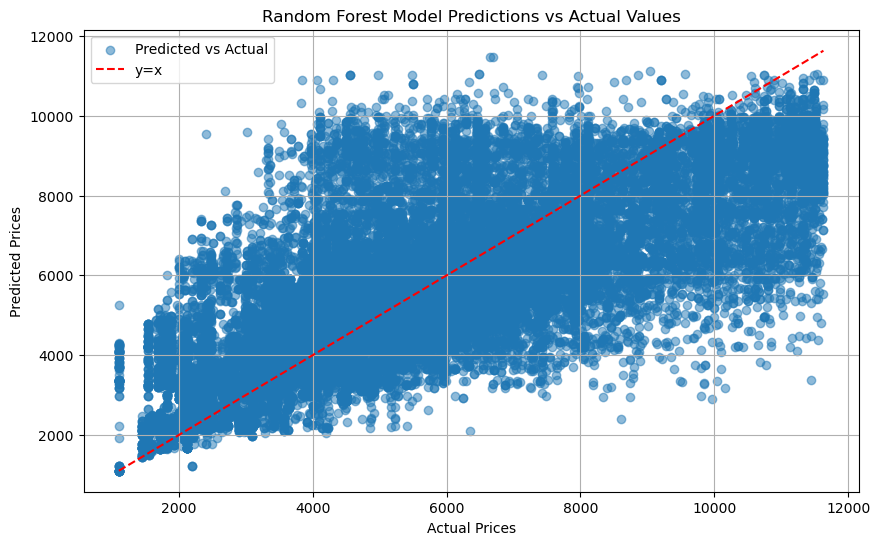

In [238]:
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted
plt.scatter(y_test_eco, y_pred_eco_forest, label='Predicted vs Actual', alpha=0.5)

# Plotting the line y=x for reference
plt.plot([df_eco_y.min(), df_eco_y.max()], [df_eco_y.min(), df_eco_y.max()], color='red', linestyle='--', label='y=x')

plt.title('Random Forest Model Predictions vs Actual Values')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid()
plt.show()

In [253]:
model_bus = RandomForestRegressor(n_estimators=300)
model_bus.fit(x_train_bus,y_train_bus)

RandomForestRegressor(n_estimators=300)

In [254]:
y_pred_bus_forest=model_bus.predict(x_test_bus)


In [255]:
mae=mean_absolute_error(y_test_bus,y_pred_bus_forest)

In [256]:
mae

2812.167367504523

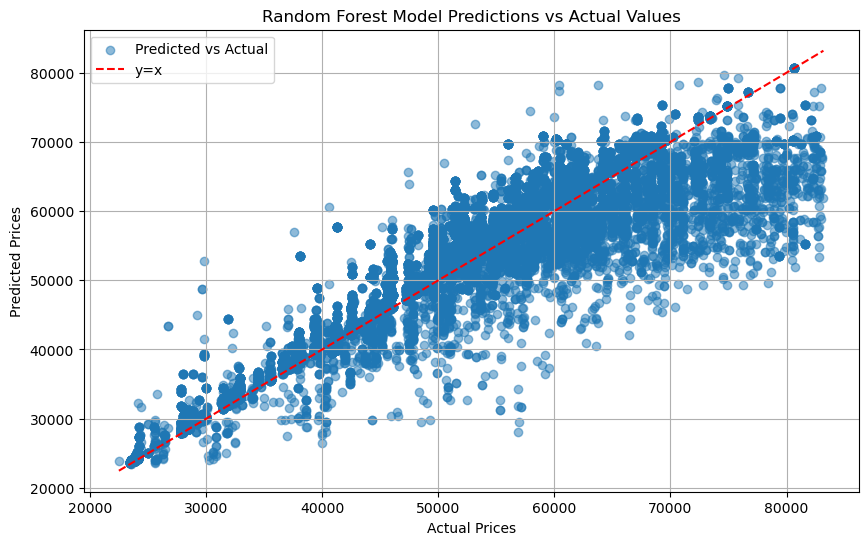

In [257]:
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted
plt.scatter(y_test_bus, y_pred_bus_forest, label='Predicted vs Actual', alpha=0.5)

# Plotting the line y=x for reference
plt.plot([df_bus_y.min(), df_bus_y.max()], [df_bus_y.min(), df_bus_y.max()], color='red', linestyle='--', label='y=x')

plt.title('Random Forest Model Predictions vs Actual Values')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid()
plt.show()

In [267]:
from sklearn.model_selection import cross_val_score

In [268]:
cv_scores = cross_val_score(RandomForestRegressor(n_estimators=100), x_train_eco, y_train_eco, cv=5)  # 5-fold CV

In [270]:
print("Cross-validated scores:", cv_scores)
print("Mean:", cv_scores.mean())
print("Standard Deviation of MAE:", cv_scores.std())

Cross-validated scores: [0.59785137 0.58844531 0.58898842 0.58621535 0.58568876]
Mean: 0.5894378427891279
Standard Deviation of MAE: 0.004391232408056414
